In [1]:
#importing necessary libraries
import pandas as pd


In [2]:
# import kagglehub
#
# # Download latest version
# path = kagglehub.dataset_download("shantanudhakadd/bank-customer-churn-prediction")
#
# print("Path to dataset files:", path)

In [3]:
#Loading the dataset
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
#Checking any NA values exist in the dataset or not
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#Checking any null values exist in the dataset or not
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
#Determining the number of unique values in the target col
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [7]:
#Dropping additional columns for better performance
df = df.drop(columns=['RowNumber','CustomerId','Surname'], axis=1)

In [8]:
#Separating each column based on its category for encoding
categorical_col = [ 'Geography']
bin_col = ['Gender']
numerical_cols = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']

In [9]:
#Encoding
from sklearn.preprocessing import OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat',OneHotEncoder(handle_unknown='ignore'),categorical_col),
        ('bin',OrdinalEncoder(),bin_col),
        ('num',StandardScaler(),numerical_cols),
    ],remainder='passthrough'
)
preprocessor

,transformers,"[('cat', ...), ('bin', ...), ...]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [10]:
#Splitting data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]


In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=56)

print(f"X_train shape: {X_train.shape}\nX_test shape: {X_test.shape}\ny_train shape: {y_train.shape}\ny_test shape: {y_test.shape}")

X_train shape: (7000, 10)
X_test shape: (3000, 10)
y_train shape: (7000,)
y_test shape: (3000,)


In [12]:
#Standardization
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [13]:
X_train_transformed.shape

(7000, 12)

In [14]:
X_test_transformed.shape

(3000, 12)

In [15]:
y.value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [16]:
#Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

lr = LogisticRegression(max_iter=1000,random_state=56)
rf = RandomForestClassifier(n_estimators=200, random_state=56)
gb = GradientBoostingClassifier(n_estimators=200,learning_rate=0.1,random_state=56)


In [17]:
lr.fit(X_train_transformed, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,56
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [18]:
rf.fit(X_train_transformed, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
gb.fit(X_train_transformed, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,200
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [20]:
#Making prediction through the models
y_pred_lr = lr.predict(X_test_transformed)
y_pred_rf = rf.predict(X_test_transformed)
y_pred_gb = gb.predict(X_test_transformed)

In [21]:
#Model Evaluation
from sklearn.metrics import accuracy_score,f1_score,classification_report



def evaluation_report(name,y_true,y_pred):
    print(f"\n{name} Evaluation: ")
    print(f"Accuracy Score:{accuracy_score(y_true,y_pred):.4f}")
    print(f"F1 Score:{f1_score(y_true,y_pred):4f}")
    print(f"Classification Report:{classification_report(y_true,y_pred,digits=4)}")
    print()

In [22]:
evaluation_report('Logistic Regression',y_test,y_pred_lr)


Logistic Regression Evaluation: 
Accuracy Score:0.8110
F1 Score:0.324195
Classification Report:              precision    recall  f1-score   support

           0     0.8274    0.9631    0.8901      2385
           1     0.6071    0.2211    0.3242       615

    accuracy                         0.8110      3000
   macro avg     0.7173    0.5921    0.6072      3000
weighted avg     0.7823    0.8110    0.7741      3000




In [23]:
evaluation_report('Random Forest',y_test,y_pred_rf)


Random Forest Evaluation: 
Accuracy Score:0.8620
F1 Score:0.586000
Classification Report:              precision    recall  f1-score   support

           0     0.8769    0.9614    0.9172      2385
           1     0.7610    0.4764    0.5860       615

    accuracy                         0.8620      3000
   macro avg     0.8190    0.7189    0.7516      3000
weighted avg     0.8531    0.8620    0.8493      3000




In [24]:
evaluation_report('Gradient Boosting Classifier',y_test,y_pred_gb)


Gradient Boosting Classifier Evaluation: 
Accuracy Score:0.8660
F1 Score:0.606654
Classification Report:              precision    recall  f1-score   support

           0     0.8824    0.9593    0.9192      2385
           1     0.7617    0.5041    0.6067       615

    accuracy                         0.8660      3000
   macro avg     0.8220    0.7317    0.7629      3000
weighted avg     0.8576    0.8660    0.8552      3000




In [25]:
#Checking the unique values for the trained models
import numpy as np

print("Unique predictions - Logistic Regression:", np.unique(y_pred_lr))
print("Unique predictions - Random Forest:", np.unique(y_pred_rf))
print("Unique predictions - Gradient Boosting:", np.unique(y_pred_gb))

Unique predictions - Logistic Regression: [0 1]
Unique predictions - Random Forest: [0 1]
Unique predictions - Gradient Boosting: [0 1]


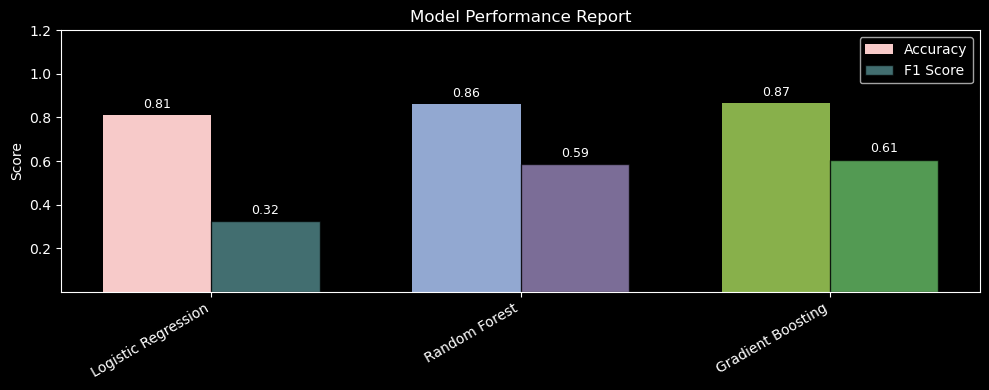

In [26]:
#Model performance comparison
import matplotlib.pyplot as plt

colors_acc = {
    'Logistic Regression':'#F7CAC9',
    'Random Forest':'#92A8D1',
    'Gradient Boosting':'#88B04B'
}

colors_f1 = {
    'Logistic Regression':'#5F9EA0',
    'Random Forest':'#B19CD9',
    'Gradient Boosting':'#77DD77'
}


models =[ 'Logistic Regression', 'Random Forest','Gradient Boosting']

accuracy      = [0.8110,0.8620,0.8660]
f1_score_each = [0.324195,0.586000,0.606654]
x = np.arange(len(models))


bar_width =0.35
plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(10,4))

bars_acc = ax.bar(
    x - bar_width/2,
    accuracy,
    width=bar_width,
    label='Accuracy',
    color=[colors_acc[m] for m in models]
)

bars_f1 = ax.bar(
    x + bar_width/2,
    f1_score_each,
    width=bar_width,
    label='F1 Score',
    edgecolor='black',
    alpha=0.7,
    color=[colors_f1[m] for m in models]
)

# Add value labels
ax.bar_label(bars_acc, labels=[f"{v:.2f}" for v in accuracy], padding=3, fontsize=9)
ax.bar_label(bars_f1, labels=[f"{v:.2f}" for v in f1_score_each], padding=3, fontsize=9)

# Customize chart
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha='right')
ax.set_ylabel('Score')
ax.set_ylim(0.001, 1.2)
ax.set_title('Model Performance Report')
ax.legend()

plt.tight_layout()
plt.show()




In [27]:
#Sample Test
churn_indices = y_test[y_test == 1].index[:5]  # first 5 fraud samples
churn_samples = X_test.loc[churn_indices]

# Transform and predict
churn_transformed = preprocessor.transform(churn_samples)
churn_pred = gb.predict(churn_transformed)

churn_proba = rf.predict_proba(churn_transformed)[:, 1]
for i in range(len(churn_samples)):
    print(f"Customer {i+1}: Actual = 1, Predicted = {churn_pred[i]} (Churn Probability: {churn_proba[i]:.2f})")


Customer 1: Actual = 1, Predicted = 0 (Churn Probability: 0.38)
Customer 2: Actual = 1, Predicted = 1 (Churn Probability: 0.57)
Customer 3: Actual = 1, Predicted = 1 (Churn Probability: 0.70)
Customer 4: Actual = 1, Predicted = 1 (Churn Probability: 0.62)
Customer 5: Actual = 1, Predicted = 1 (Churn Probability: 0.88)


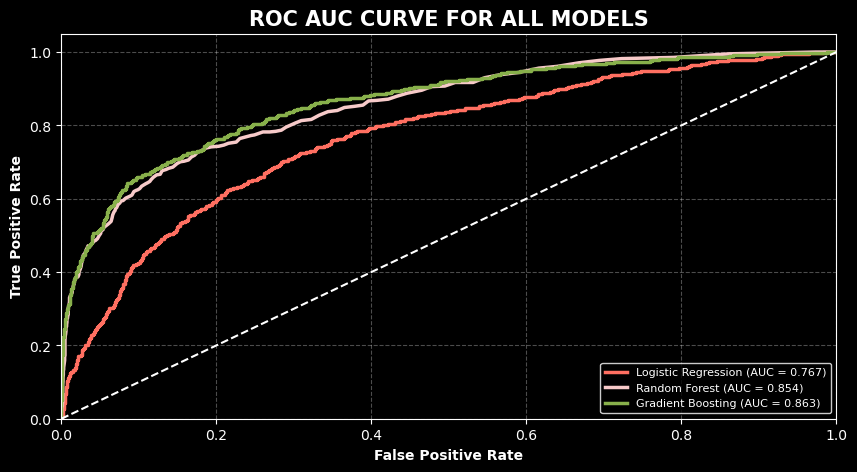

In [28]:
#ROC AUC CURVE:

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

models_stratified = {
    'Logistic Regression': lr,
    'Random Forest': rf,
    'Gradient Boosting': gb
}

# colors for plotting
colors = {
    'Logistic Regression': '#FF6F61',
    'Random Forest': '#F7CAC9',
    'Gradient Boosting': '#88B04B'
}

plt.style.use('dark_background')
plt.figure(figsize=(10,5))

for name, model in models_stratified.items():
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_transformed)[:, 1]

    # computing ROC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    # plotting curve
    plt.plot(fpr, tpr, color=colors[name], lw=2.5,
             label=f"{name} (AUC = {roc_auc:.3f})")

# reference diagonal line
plt.plot([0, 1], [0, 1], 'w--', lw=1.5)

# formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=10, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=10, fontweight='bold')
plt.title("ROC AUC CURVE FOR ALL MODELS", fontsize=15, fontweight='bold')
plt.legend(fontsize=8, loc='lower right', frameon=True,
           facecolor='black', edgecolor='white')
plt.grid(alpha=0.3,linestyle='--')

plt.show()


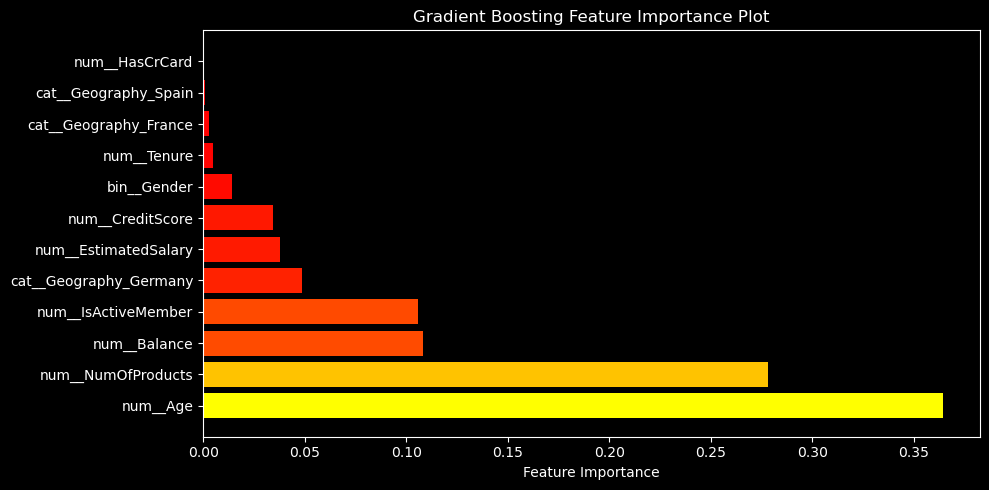

In [29]:
#Feature Importance

importances = gb.feature_importances_
feature_names =preprocessor.get_feature_names_out()
sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10,5))
plt.barh(np.array(feature_names)[sorted_idx], importances[sorted_idx],color=plt.cm.autumn(importances[sorted_idx] / max(importances)))
plt.xlabel('Feature Importance')
plt.title("Gradient Boosting Feature Importance Plot")
plt.tight_layout()
plt.show()

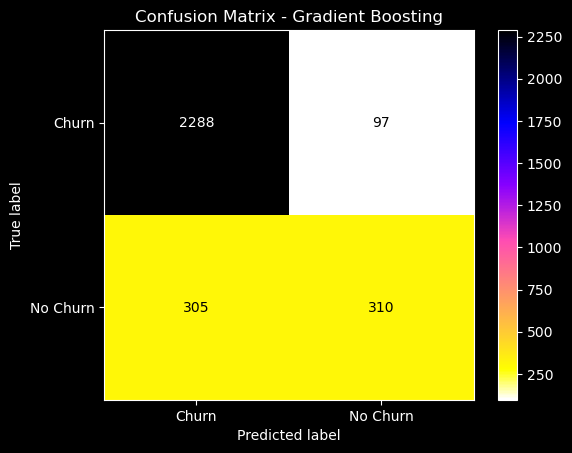

In [30]:
#Confusion Matrix for the best model :Gradient Boosting

from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay


cm = confusion_matrix(y_test,y_pred_gb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Churn','No Churn'])
disp.plot(cmap='gnuplot2_r')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()
